In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))
import numpy as np; np.set_printoptions(linewidth=110);
import pandas as pd; pd.set_option("display.max_columns", None)

import os
import sys
from sys import platform

import matplotlib.pyplot as plt
import scipy
import seaborn
from tqdm import tqdm
from tqdm.notebook import trange
import time
import functools

In [30]:
def generate_spikes(R, T, alpha, beta, dist):
    
    print('mean FR', beta/alpha, '\tCV', 1/np.sqrt(alpha))  # var=alpha/beta^2, mean=alpha/beta

    T_start = 0
    spike_times = [0] * R

    for r in tqdm(range(R), ncols=120, file=sys.stdout):
        spike_trail = []
        curr_t = -1  # Start far from origin.
        while curr_t < T:
            if dist == "gamma":
                isi = np.random.gamma(alpha, 1/beta, 1)[0]
            else:
                isi = np.random.wald(alpha, beta, 1)[0]
    #         print(isi)
            curr_t = curr_t + isi
            if curr_t >= 0 and curr_t < T:
                spike_trail.append(curr_t)
        spike_times[r] = spike_trail
    return spike_times

def plot_isi_distribution(isi_list):
    lambda_hat = np.mean(isi_list)
    t = np.linspace(0, 5*lambda_hat, 1000)
    plt.figure(figsize=[4, 3])
    seaborn.distplot(isi_list, bins=100, kde=False, norm_hist=True, label='isi distribution')
    plt.plot(t, scipy.stats.expon.pdf(t, scale=lambda_hat), c='r', label='Estimated Exponential')
    plt.legend(loc=[1.02, 0])
    plt.xlim(0, 5*lambda_hat)


In [29]:
isi = np.random.wald(mu, lambd, 10000)
isi.std()/isi.mean()

0.7574686357246634

mean FR 1.7777777777777777 	CV 5.0
100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 8848.15it/s]


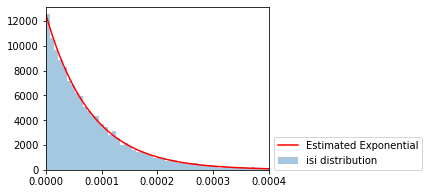

In [95]:
# dist = "gamma"
dist = "invgauss"

if dist == "gamma":
    CV = 0.75
    fr = 25
    alpha = (1/CV**2)
    beta = alpha*fr
    spike_times = generate_spikes(R=500, T=1, alpha=alpha, beta=beta, dist=dist)
else:
    CV = 0.75
    fr = 25
    mu = 1.0/fr
    lambd = 1.0/CV**2 *mu
    spike_times = generate_spikes(R=500, T=1, alpha=mu, beta=lambd, dist=dist)
    
merged_spike_times = functools.reduce(lambda x, y: x+y, spike_times)
merged_spike_times = np.sort(merged_spike_times)
merged_isi = np.diff(merged_spike_times)
plot_isi_distribution(merged_isi)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PSTH')

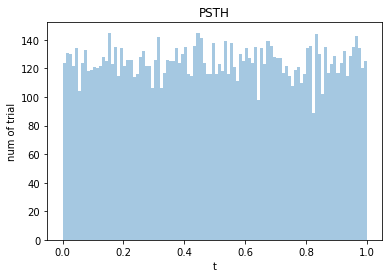

In [96]:
seaborn.distplot(merged_spike_times, bins=100, kde=False)
plt.xlabel("t")
plt.ylabel("num of trial")
plt.title("PSTH")

Power_divergenceResult(statistic=85.56111645813282, pvalue=0.8299829869804694)

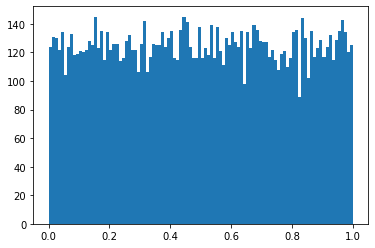

In [100]:
import matplotlib.pyplot as plt
psth = plt.hist(merged_spike_times, bins=100)
psth = psth[0]
scipy.stats.chisquare(psth)

In [101]:
scipy.stats.kstest(merged_spike_times, "uniform")

KstestResult(statistic=0.004154627809156652, pvalue=0.981908401484766)

mean FR 1.7777777777777777 	CV 5.0
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]


Text(0.5, 1.0, 'PSTH')

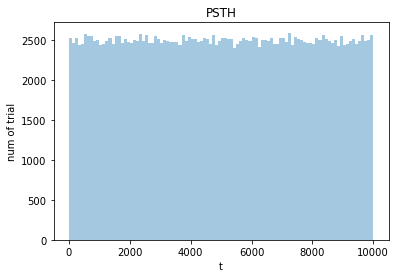

In [92]:
CV = 0.75
fr = 25
mu = 1.0/fr
lambd = 1.0/CV**2 *mu
spike_times = generate_spikes(R=1, T=1e4, alpha=mu, beta=lambd, dist=dist)
merged_spike_times = functools.reduce(lambda x, y: x+y, spike_times)
merged_spike_times = np.sort(merged_spike_times)
seaborn.distplot(merged_spike_times, bins=100, kde=False)
plt.xlabel("t")
plt.ylabel("num of trial")
plt.title("PSTH")



Power_divergenceResult(statistic=553.1629917163552, pvalue=1.0)

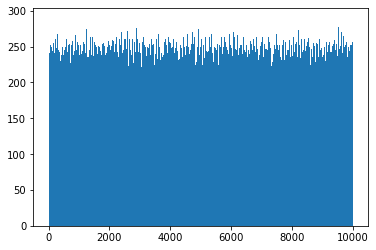

In [94]:
psth = plt.hist(merged_spike_times, bins=100)
psth = psth[0]
scipy.stats.chisquare(psth)